In [1]:
import os
import sys

module_path = os.path.abspath(os.path.join('../..'))

if module_path not in sys.path:
    sys.path.append(module_path)

# Box-Constrained Quadratic Methods

A general quadratic optimization problem subject to linear constraints i.e., equality and inequality constraints, can be written as:

$$
\begin{equation}
    \begin{aligned}
        \min_x \quad & \frac{1}{2}x^T Q x + q^T x \\
            \textrm{subject to} \quad & Gx \leq h \\ & Ax = b
    \end{aligned}
\end{equation}
$$

For what about its usage in machine learning i.e., for training support vector machines, we are interested in a special case of this problem where the inequality constraints are expressed as box-constraints:

$$
\begin{equation}
    \begin{aligned}
        \min_x \quad & \frac{1}{2}x^T Q x + q^T x \\
            \textrm{subject to} \quad & Ax = b \\ & lb \leq x \leq ub
    \end{aligned}
\end{equation}
$$

where the equality vector $b$ and the lower bound $lb$ are vectors of all ones

Now, since we can't hope to train a large SVM trough a QP solver to minimize the problem seen so far, we will need to use methods that use small working sets e.g., *Sequential Minimal Optimization*, or to consider the *Lagrangian Dual Relaxation* of the equality constraints which leads us to consider the problem as a generic quadratic box-constrained optimization problem defined as follow:

$$
\begin{equation}
    \begin{aligned}
        \min_x \quad & \frac{1}{2}x^T Q x + q^T x \\
            \textrm{subject to} \quad & lb \leq x \leq ub
    \end{aligned}
\end{equation}
$$

where the lower bound $lb$ is a vector of all ones.

In [24]:
from optiml.optimization.constrained import *
from optiml.optimization.utils import plot_trajectory_optimization

In [35]:
bcq = BoxConstrainedQuadratic(ndim=2)

## Projected Gradient

iter	cost		gnorm
   0	-1.7241e+02	4.7907e+01
   1	-2.2041e+02	8.9336e-01
   2	-2.2326e+02	2.2255e+00
   3	-2.2336e+02	2.9850e-01
   4	-2.2337e+02	1.0898e-01
   5	-2.2337e+02	0.0000e+00

[8.27736124 1.74576686]


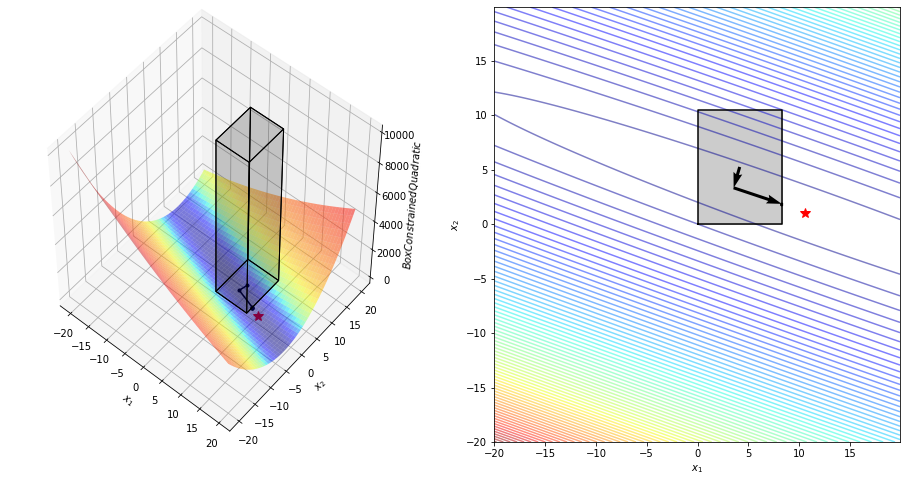

In [36]:
opt = ProjectedGradient(f=bcq, verbose=True).minimize()
print(opt.x)
plot_trajectory_optimization(bcq, opt, x_min=-20, x_max=20, y_min=-20, y_max=20)

## Frank-Wolfe or Conditional Gradient

iter	cost		lb		gap
   0	-1.7241e+02	-4.7082e+02	1.7309e+00
  50	-2.2260e+02	-2.2379e+02	5.3286e-03
 100	-2.2290e+02	-2.2358e+02	3.0297e-03
 150	-2.2303e+02	-2.2351e+02	2.1524e-03
 200	-2.2309e+02	-2.2347e+02	1.6829e-03
 250	-2.2314e+02	-2.2345e+02	1.3881e-03
 300	-2.2317e+02	-2.2343e+02	1.1847e-03
 350	-2.2319e+02	-2.2342e+02	1.0356e-03
 400	-2.2321e+02	-2.2342e+02	9.2113e-04
 450	-2.2323e+02	-2.2341e+02	8.3041e-04
 500	-2.2324e+02	-2.2341e+02	7.5663e-04
 550	-2.2325e+02	-2.2340e+02	6.9536e-04
 600	-2.2326e+02	-2.2340e+02	6.4363e-04
 650	-2.2326e+02	-2.2340e+02	5.9934e-04
 700	-2.2327e+02	-2.2340e+02	5.6097e-04
 750	-2.2328e+02	-2.2339e+02	5.2738e-04
 800	-2.2328e+02	-2.2339e+02	4.9772e-04
 850	-2.2329e+02	-2.2339e+02	4.7132e-04
 900	-2.2329e+02	-2.2339e+02	4.4768e-04
 950	-2.2329e+02	-2.2339e+02	4.2637e-04
1000	-2.2330e+02	-2.2339e+02	4.0705e-04

[8.05416209 1.81747231]


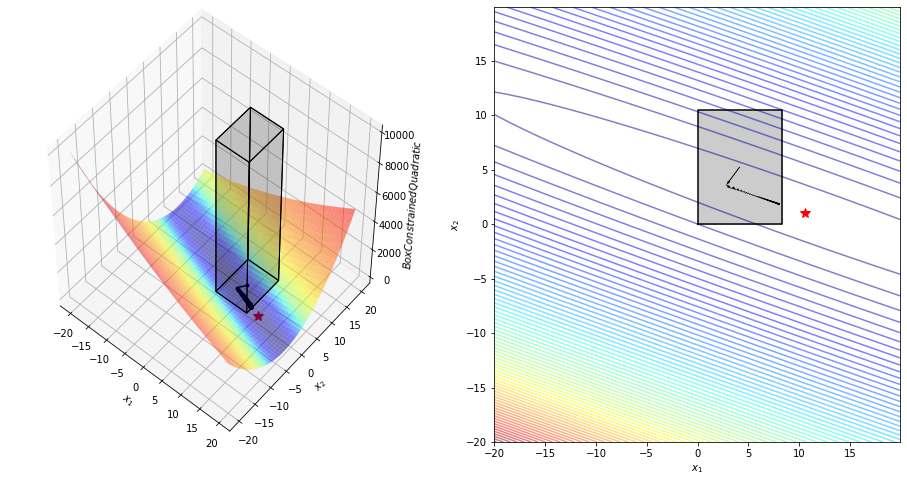

In [38]:
opt = FrankWolfe(f=bcq, verbose=50).minimize()
print(opt.x)
plot_trajectory_optimization(bcq, opt, x_min=-20, x_max=20, y_min=-20, y_max=20)

## Active Set

iter	cost		|B|	I/O
   0	-1.7241e+02	0	I 0+1
   1	-1.7632e+02	1	

[8.27736124 3.83528779]


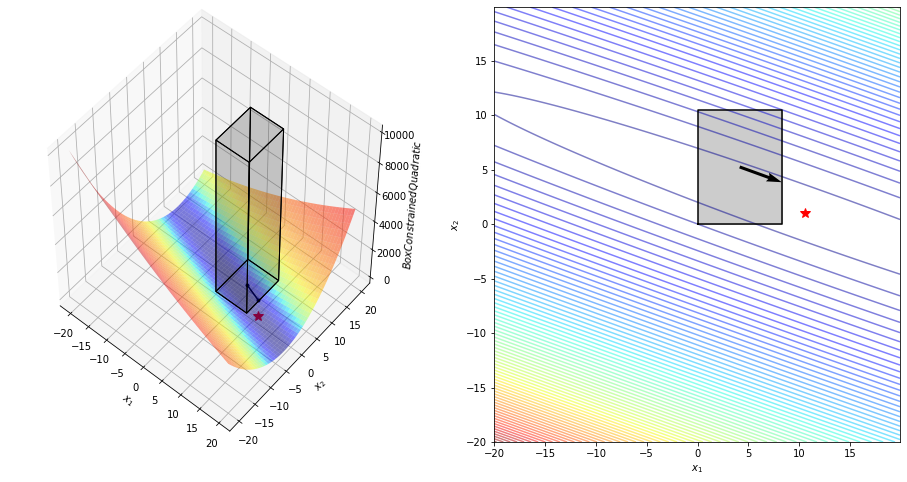

In [39]:
opt = ActiveSet(f=bcq, verbose=True).minimize()
print(opt.x)
plot_trajectory_optimization(bcq, opt, x_min=-20, x_max=20, y_min=-20, y_max=20)

## Interior Point

In [ ]:
opt = InteriorPoint(f=bcq, verbose=True).minimize()
print(opt.x)
plot_trajectory_optimization(bcq, opt, x_min=-20, x_max=20, y_min=-20, y_max=20)

## Lagrangian Dual Relaxation

iter	cost		p		gap
   0	-1.7241e+02	-4.7082e+02	1.7309e+00
   1	-2.1914e+02	-3.0497e+02	3.9165e-01
   2	-2.2038e+02	-2.3272e+02	5.5991e-02
   3	-2.2180e+02	-2.2612e+02	1.9473e-02
   4	-2.2325e+02	-2.2415e+02	4.0040e-03
   5	-2.2331e+02	-2.2348e+02	7.5374e-04
   6	-2.2337e+02	-2.2339e+02	9.3101e-05
   7	-2.2337e+02	-2.2337e+02	1.5542e-05
   8	-2.2337e+02	-2.2337e+02	1.8347e-06
   9	-2.2337e+02	-2.2337e+02	3.0532e-07
  10	-2.2337e+02	-2.2337e+02	3.6010e-08
  11	-2.2337e+02	-2.2337e+02	5.9922e-09
  12	-2.2337e+02	-2.2337e+02	7.0674e-10
  13	-2.2337e+02	-2.2337e+02	1.1760e-10
  14	-2.2337e+02	-2.2337e+02	1.3870e-11

[8.27736123 1.74576686]


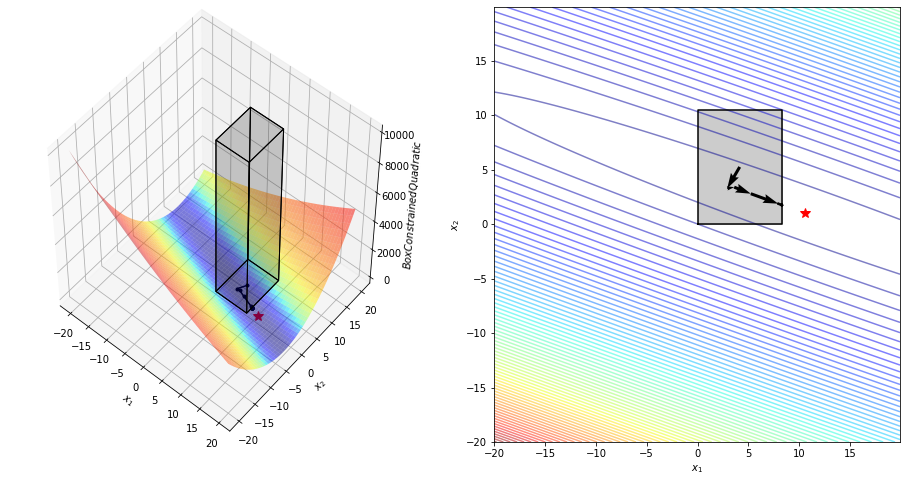

In [40]:
## Lagrangian Dual Relaxation

## Lagrangian Dual Relaxation